In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodel.formula.api import ols
import sklearn.linear_model
import sklearn.metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('tvmarketing.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [14]:
display(df.describe())
print('\n\n')
display(df.info())
print('\n\n')

print(df.columns)
display('duplicates:', df.duplicated().sum())
print('\n\n')
display(df.isna().sum())

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


None




Index(['TV', 'Sales'], dtype='object')


'duplicates:'

np.int64(0)

TV       0
Sales    0
dtype: int64

<Axes: xlabel='TV', ylabel='Sales'>

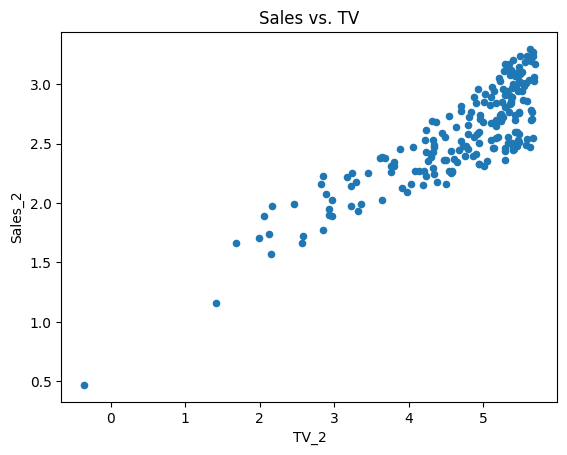

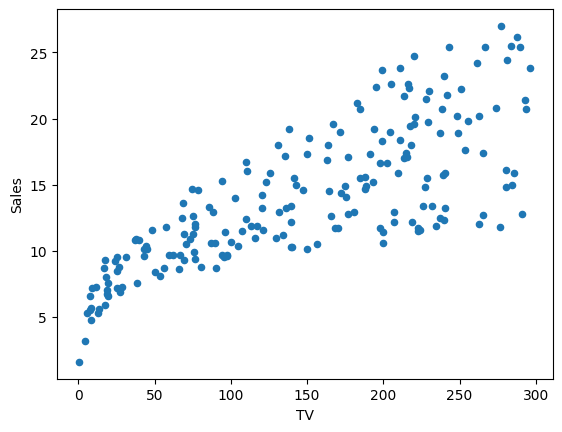

In [15]:
from sklearn.preprocessing import StandardScaler
df['Sales_2'] = np.log(df['Sales'])
df['TV_2'] = np.log(df['TV'])
df.plot(kind='scatter',
        x='TV_2',
        y='Sales_2',
        title='Sales vs. TV')
df.plot(kind='scatter',
         x='TV',
         y='Sales')

In [16]:
df['TV_2']

0      5.438514
1      3.795489
2      2.844909
3      5.020586
4      5.197391
         ...   
195    3.642836
196    4.545420
197    5.176150
198    5.647565
199    5.447168
Name: TV_2, Length: 200, dtype: float64

In [17]:
df['TV_2'].corr(df['Sales_2'])

np.float64(0.861473334442017)

<Axes: xlabel='TV_2', ylabel='Sales_2'>

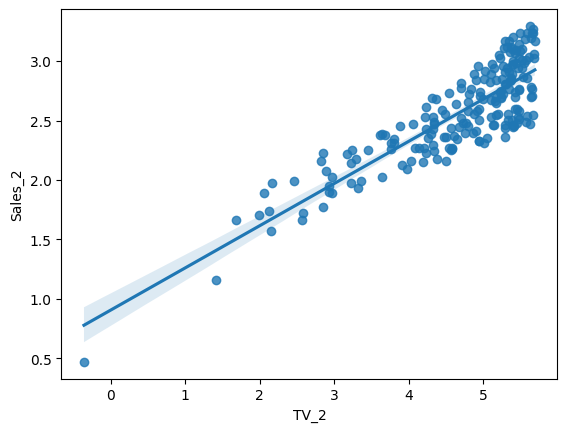

In [18]:
sns.regplot(data=df,
             x='TV_2',
             y='Sales_2')



<Axes: xlabel='TV', ylabel='Sales'>

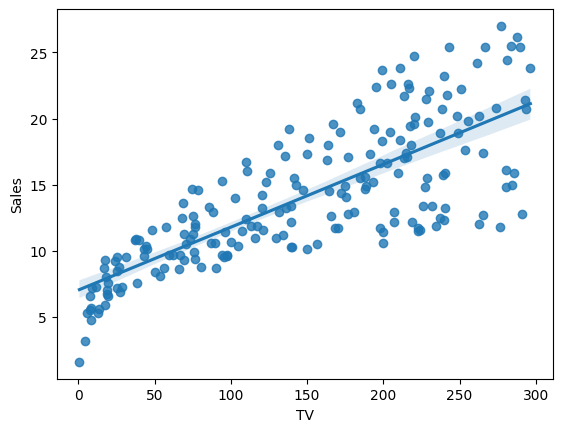

In [19]:
sns.regplot(data=df,
            x='TV',
            y='Sales')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       200 non-null    float64
 1   Sales    200 non-null    float64
 2   Sales_2  200 non-null    float64
 3   TV_2     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [21]:
X = df[['TV_2']]
y = df[['Sales_2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)
mdl_tv_sales = sklearn.linear_model.LinearRegression()
mdl_tv_sales.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
print(5*'-', ' Data ', 5*'-')
print('log_slope:',mdl_tv_sales.coef_[0,0])
print('log_intercept',mdl_tv_sales.intercept_)
print('\n\n')

-----  Data  -----
log_slope: 0.34550847241777377
log_intercept [0.94980269]





In [23]:
sklearn.metrics.r2_score(y_test, mdl_tv_sales.predict(X_test))

0.8199628785178819